In [3]:
import pandas as pd
import folium
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"

metro_df = pd.read_csv("Delhi-Metro-Network.csv")

print(metro_df.head())

   Station ID         Station Name  Distance from Start (km)          Line  \
0           1             Jhil Mil                      10.3      Red line   
1           2  Welcome [Conn: Red]                      46.8     Pink line   
2           3          DLF Phase 3                      10.0   Rapid Metro   
3           4           Okhla NSIC                      23.8  Magenta line   
4           5           Dwarka Mor                      10.2     Blue line   

  Opening Date Station Layout   Latitude  Longitude  
0   2008-04-06       Elevated  28.675790  77.312390  
1   2018-10-31       Elevated  28.671800  77.277560  
2   2013-11-14       Elevated  28.493600  77.093500  
3   2017-12-25       Elevated  28.554483  77.264849  
4   2005-12-30       Elevated  28.619320  77.033260  


In [4]:
# checking for missing values
missing_values = metro_df.isnull().sum()

# checking data types
data_types = metro_df.dtypes

print(missing_values)

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64


In [5]:
# converting 'Opening Date' to datetime format
metro_df['Opening Date'] = pd.to_datetime(metro_df['Opening Date'])

In [6]:
# defining a color scheme for the metro lines
line_colors = {
    'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'
}

delhi_map_with_line_tooltip = folium.Map(location=[28.7041, 77.1025], zoom_start=11)

# adding colored markers for each metro station with line name in tooltip
for index, row in metro_df.iterrows():
    line = row['Line']
    color = line_colors.get(line, 'black')  # Default color is black if line not found in the dictionary
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Name']}",
        tooltip=f"{row['Station Name']}, {line}",
        icon=folium.Icon(color=color)
    ).add_to(delhi_map_with_line_tooltip)

# Displaying the updated map
delhi_map_with_line_tooltip

In [7]:
metro_df['Opening Year'] = metro_df['Opening Date'].dt.year

# counting the number of stations opened each year
stations_per_year = metro_df['Opening Year'].value_counts().sort_index()

stations_per_year_df = stations_per_year.reset_index()
stations_per_year_df.columns = ['Year', 'Number of Stations']

fig = px.bar(stations_per_year_df, x='Year', y='Number of Stations',
             title="Number of Metro Stations Opened Each Year in Delhi",
             labels={'Year': 'Year', 'Number of Stations': 'Number of Stations Opened'})

fig.update_layout(xaxis_tickangle=-45, xaxis=dict(tickmode='linear'),
                  yaxis=dict(title='Number of Stations Opened'),
                  xaxis_title="Year")

fig.show()

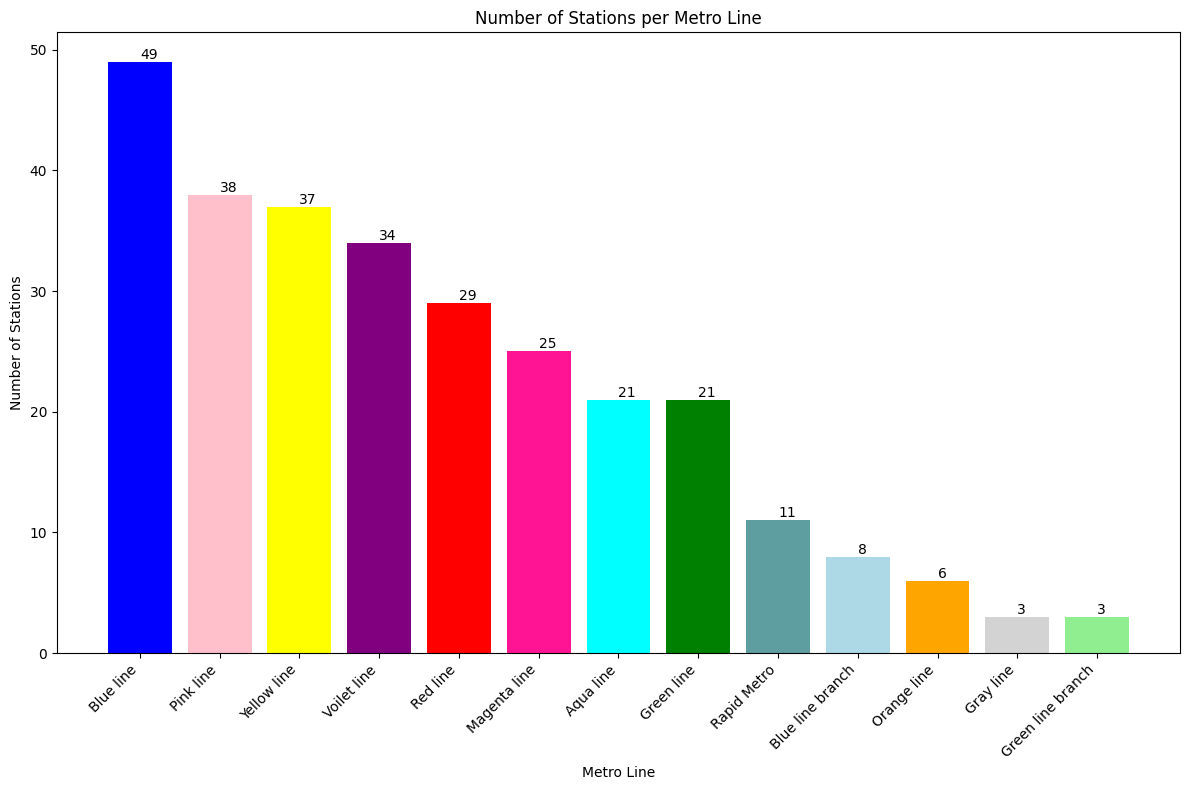

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the number of stations per line
stations_per_line = metro_df['Line'].value_counts()

# Calculating the total distance of each metro line (max distance from start)
total_distance_per_line = metro_df.groupby('Line')['Distance from Start (km)'].max()

# Calculating the average distance between stations
avg_distance_per_line = total_distance_per_line / (stations_per_line - 1)

# Creating a DataFrame for analysis
line_analysis = pd.DataFrame({
    'Line': stations_per_line.index,
    'Number of Stations': stations_per_line.values,
    'Average Distance Between Stations (km)': avg_distance_per_line
})

# Sorting the DataFrame by the number of stations
line_analysis = line_analysis.sort_values(by='Number of Stations', ascending=False)
line_analysis.reset_index(drop=True, inplace=True)

# Define custom colors for each line
line_colors = {
    'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': '#FFFF00',  # Bright yellow
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'deeppink',  # Dark pink for magenta
    'Orange line': '#FFA500',  # Bright orange
    'Rapid Metro': 'cadetblue',
    'Aqua line': '#00FFFF',  # Aqua color
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'
}

# Apply colors to the DataFrame
line_analysis['Color'] = line_analysis['Line'].map(line_colors)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(line_analysis['Line'], line_analysis['Number of Stations'], color=line_analysis['Color'])

# Adding exact numbers on the y-axis
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # Use 'bottom' for placing text at the top

plt.title('Number of Stations per Metro Line')
plt.xlabel('Metro Line')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

In [9]:
import pandas as pd
import plotly.express as px

# Calculate the counts of each station layout
layout_counts = metro_df['Station Layout'].value_counts()

# Calculate the percentage of each station layout
layout_percentages = (layout_counts / layout_counts.sum()) * 100

# Create a DataFrame for the pie chart
pie_data = pd.DataFrame({'Station Layout': layout_percentages.index, 'Percentage': layout_percentages.values})

# Create the pie chart using Plotly
fig = px.pie(pie_data, values='Percentage', names='Station Layout', title='Distribution of Delhi Metro Station Layouts')

# Show the pie chart
fig.show()
